# Import data from files

Using pandas to import the data, here we're importing the square and elliptical data from the files square.txt and elliptical.txt from the data/ folder.

In [1]:
import pandas as pd

data_folder = 'data/'
square_df = pd.read_csv(data_folder + 'square.txt', names=['x', 'y'], sep=' ')
elliptical_df = pd.read_csv(data_folder + 'elliptical.txt', names=['x', 'y'], sep=' ')
print("Number of points in square: {}".format(square_df.shape[0]))
print("Number of points in elliptical: {}".format(elliptical_df.shape[0]))

Number of points in square: 100
Number of points in elliptical: 1000


# Data Visualization

To visualize how spread the data is,  we plot the data in 2-dimensional plane where each data point is presented a point in the plane. The data is plotted using scatter() function. Here the data is also presented side by side to see the difference between them.

Text(0.5, 1.0, 'Elliptical')

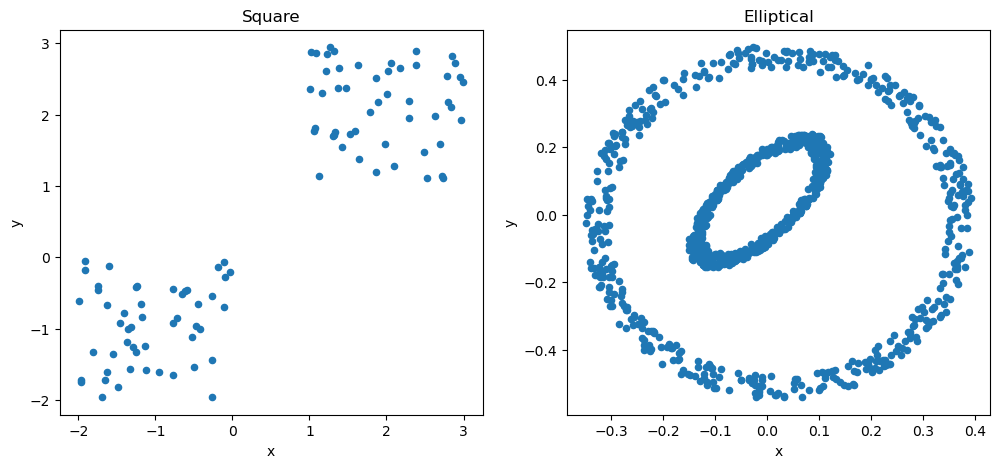

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',ax=ax1)
ax1.set_title('Square')
elliptical_df.plot.scatter(x='x',y='y',ax=ax2)
ax2.set_title('Elliptical')

We can see that the swear data has a convex characteristic, while the elliptical data is non-convex.

# K-Means Clustering

We use the Kmeans class implemented in the lib/ folder. We pass k equals two as a parameter to the Kmeans class to find 2 clusters on Square and Elliptical datasets.

In [3]:
from lib.kmeans import Kmeans
import time

start = time.time()
k_means1 = Kmeans(k=2, data=square_df.to_numpy())
k_means1.run()
labels1 = k_means1.labels
k_means1_time = time.time() - start
k_means2 = Kmeans(k=2, data=elliptical_df.to_numpy())
k_means2.run()
labels2 = k_means2.labels
k_means2_time = time.time() - start - k_means1_time
print('K-means 1 time: ', k_means1_time)
print('K-means 2 time: ', k_means2_time)

K-means 1 time:  0.0016884803771972656
K-means 2 time:  0.03462672233581543


Here we visualize the result in 2-dimensional graphs.

Text(0.5, 1.0, 'Elliptical Data')

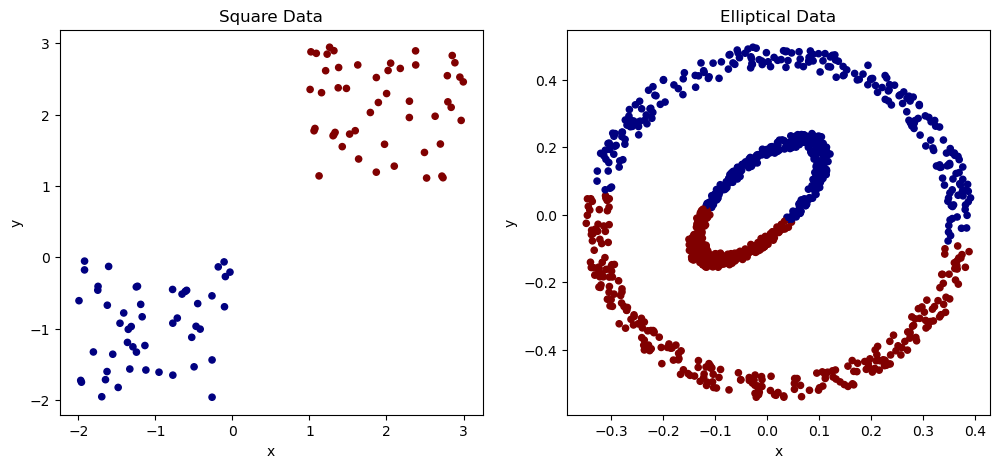

In [4]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
ax1.set_title('Square Data')
elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
ax2.set_title('Elliptical Data')

We can see that the clustering result from the square data is much better than the elliptical data. This is because K-means are often better at clustering convex data than non-convex data.

## K-Means Clustering: Effects of centroid initialization

First, we generate multiple centroids and store them in an array to observe the effects of centroid initialization. Because we will cluster the data into two clusters, we sample two data points in the data set as our centroids for each case.

In [5]:
import numpy as np

centroids_cases1 = []
centroids_cases2 = []
for i in range(20):
    centroids_cases1.append(square_df.sample(2).to_numpy())
    centroids_cases2.append(elliptical_df.sample(2).to_numpy())

Next, we loop for the centroids cases. We pass each centroids case to the run() function of the Kmeans class to cluster the data with the according centroids. Finally, we visualize each case to see the difference between them.

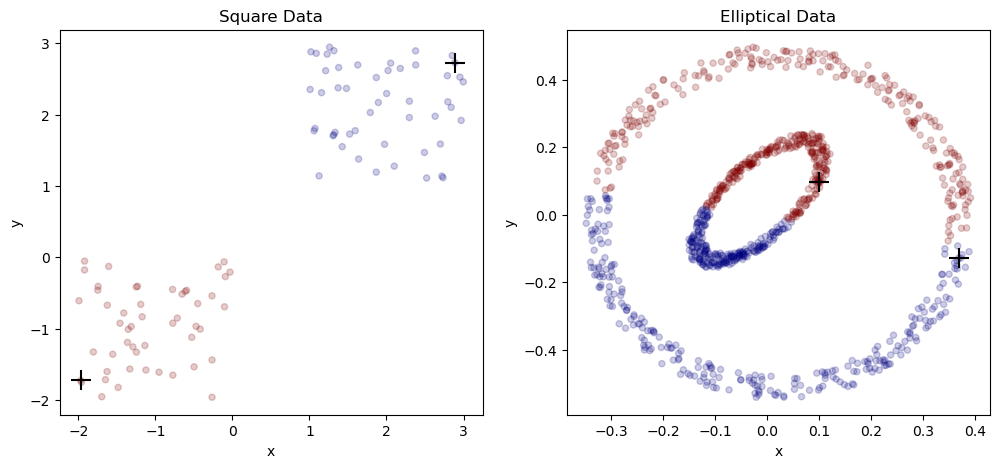

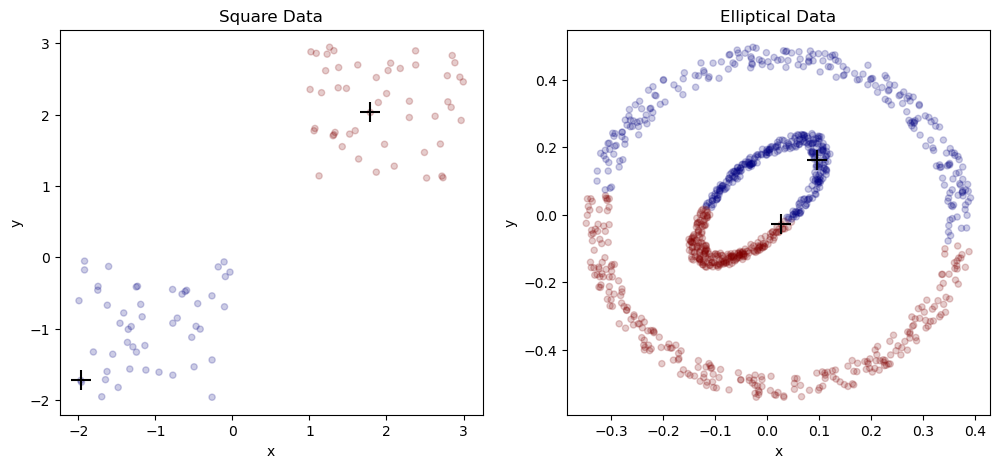

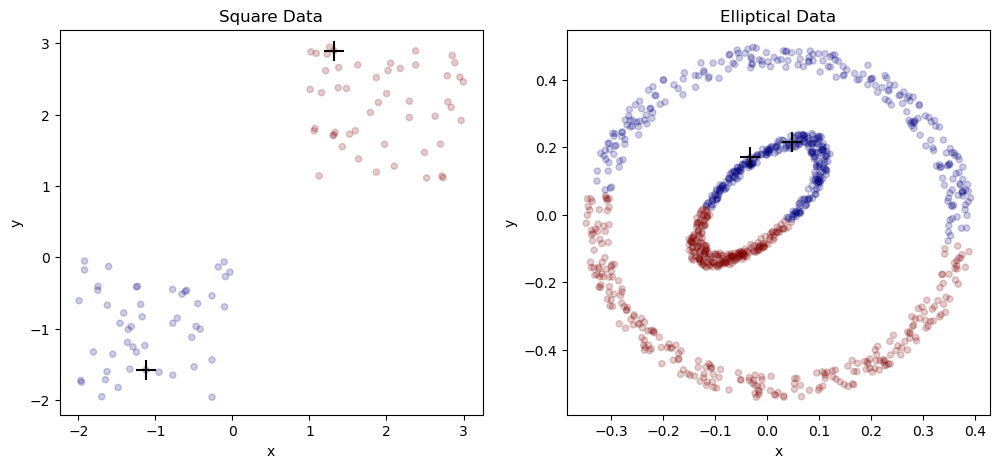

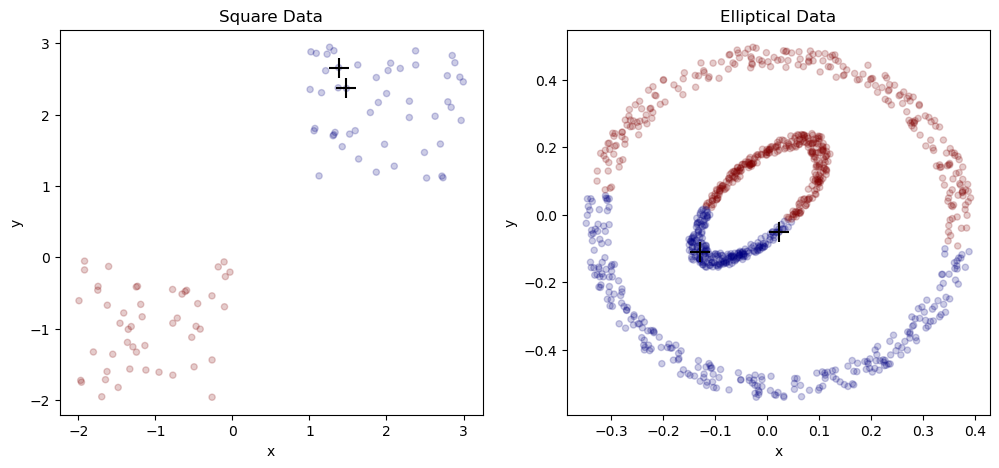

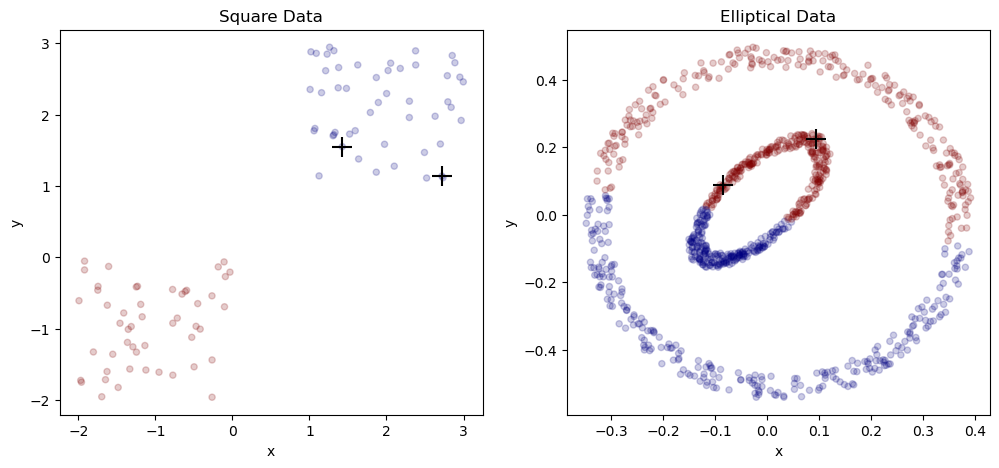

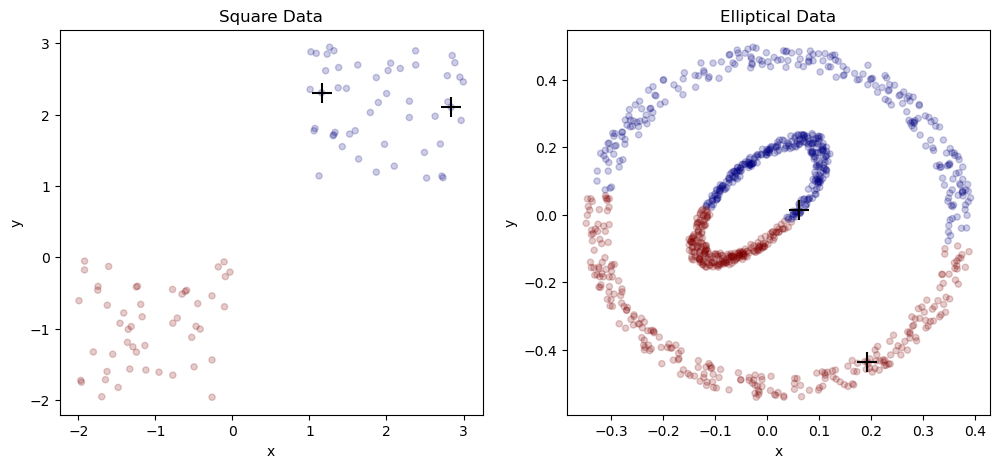

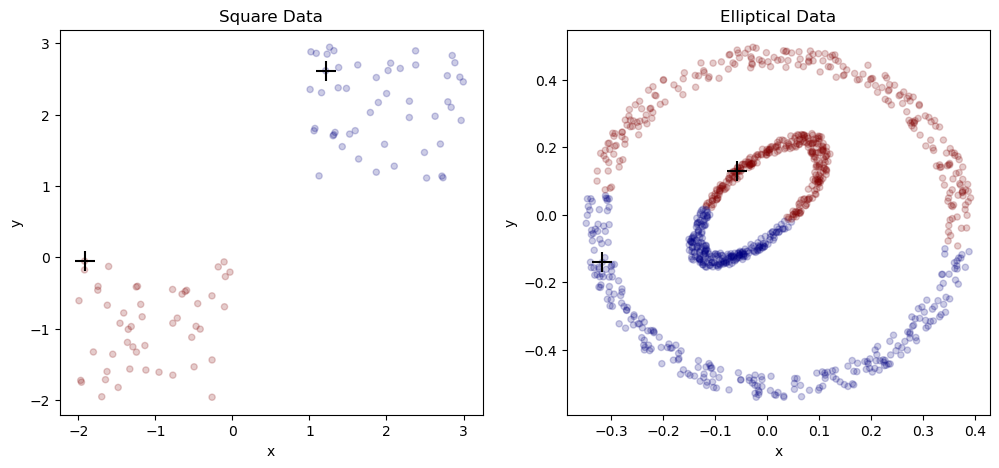

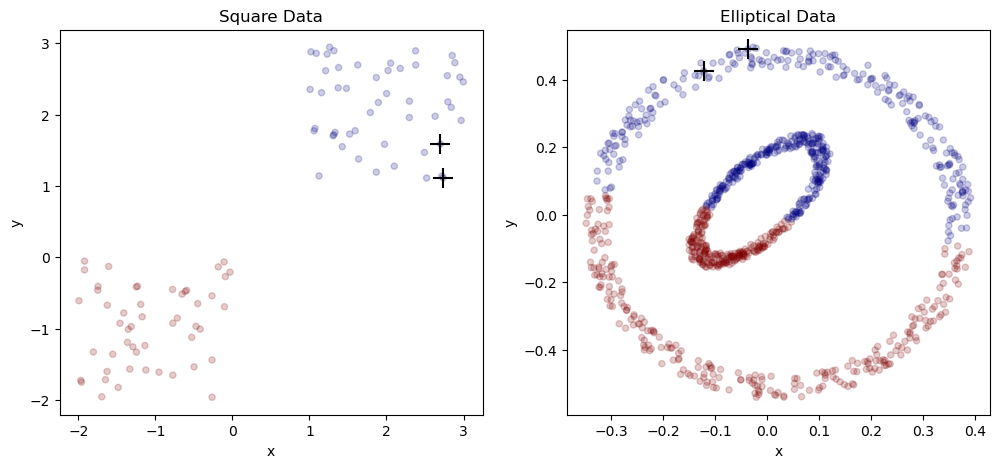

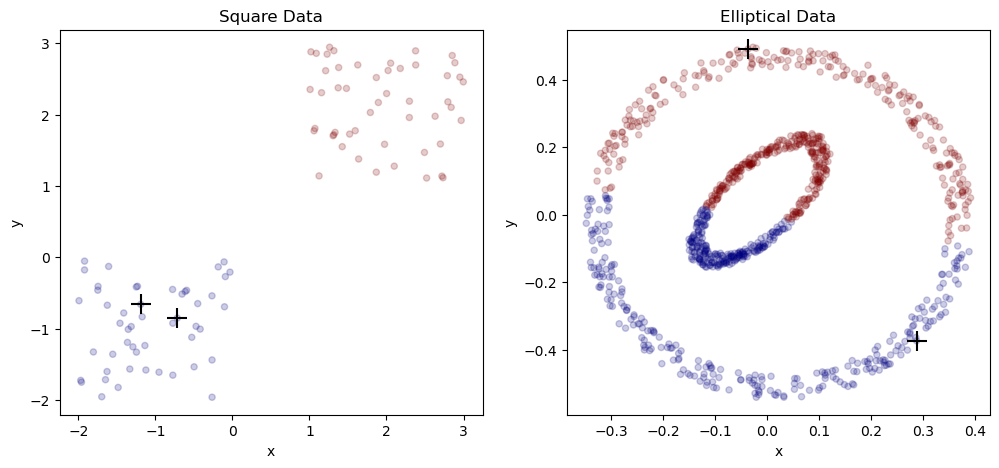

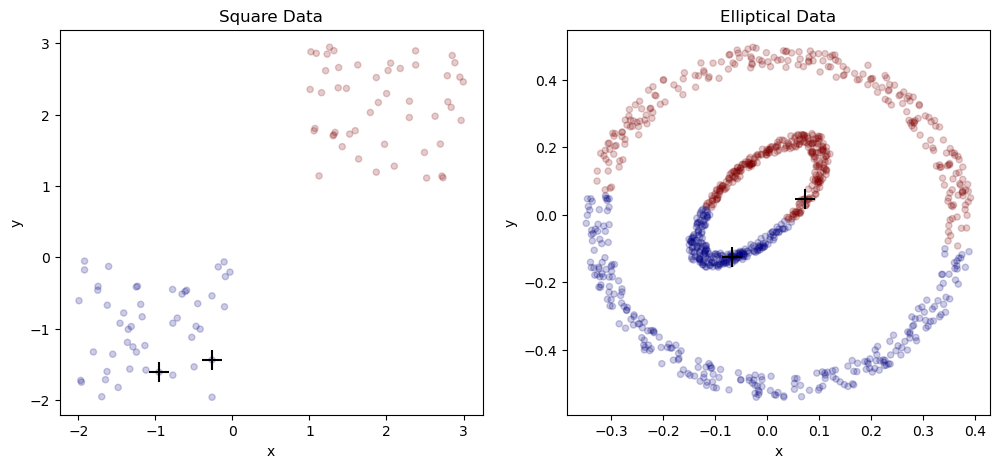

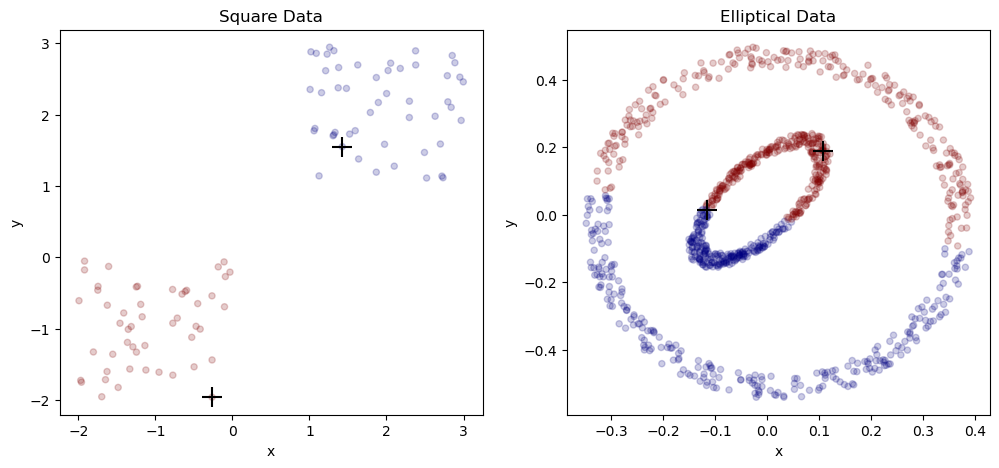

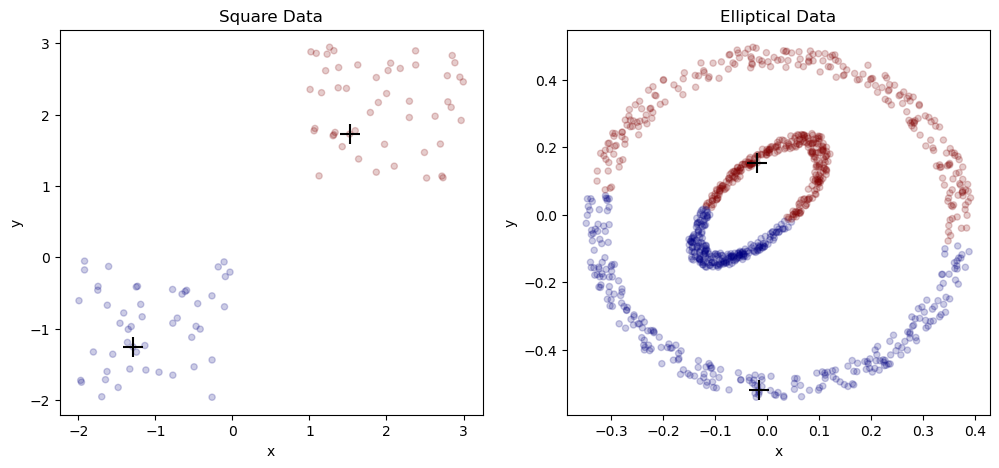

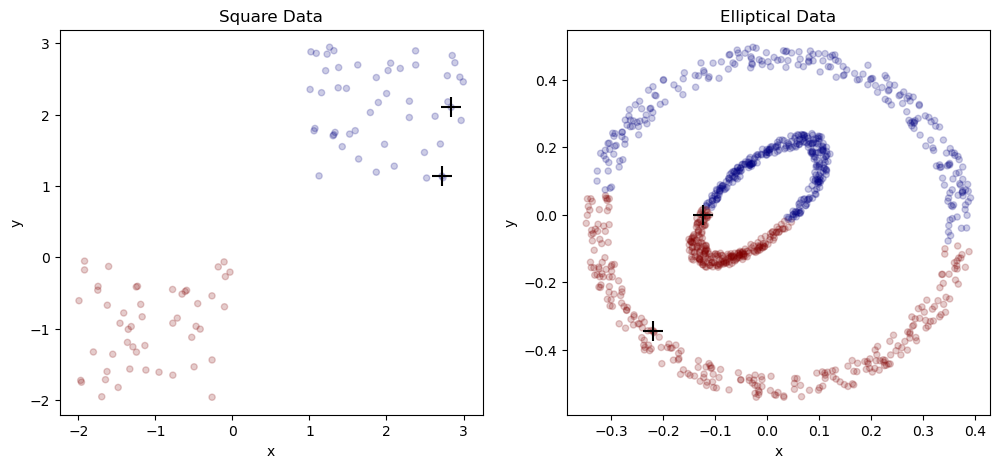

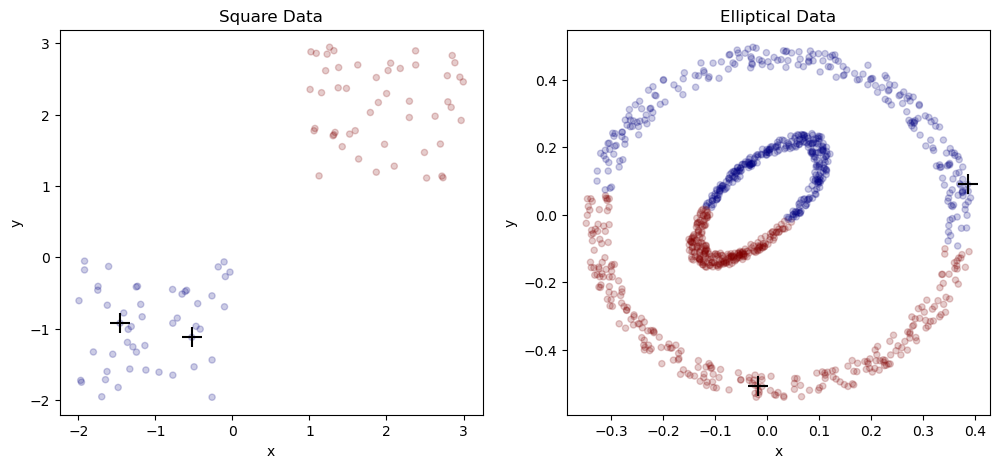

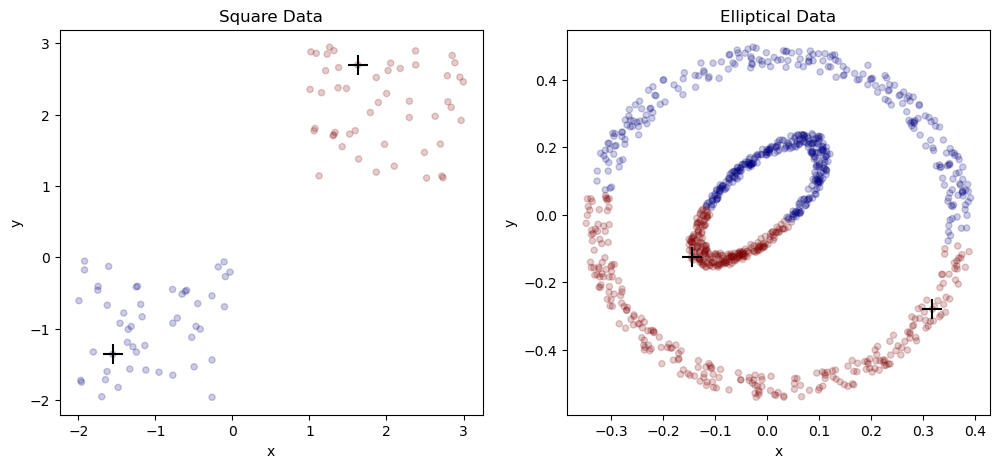

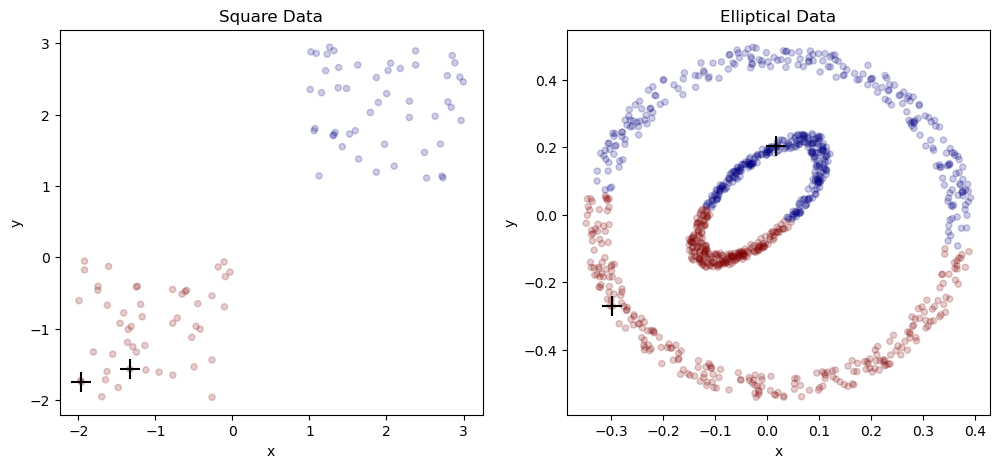

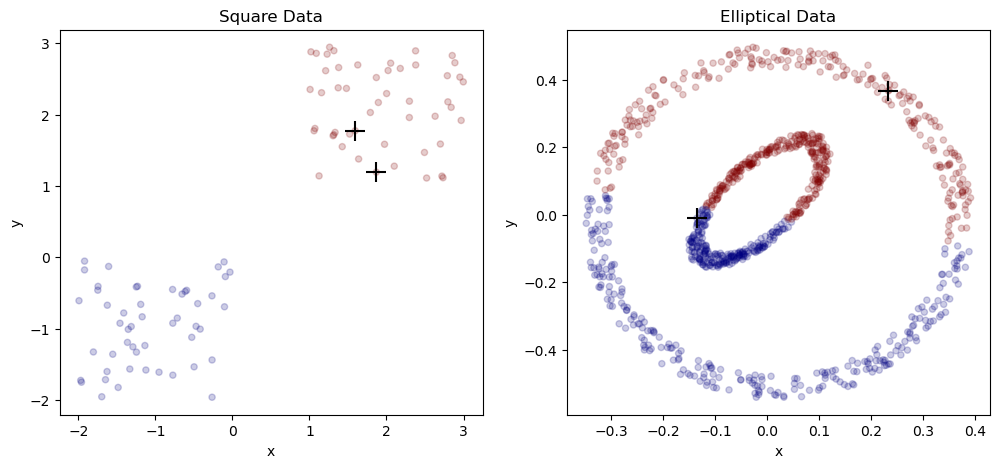

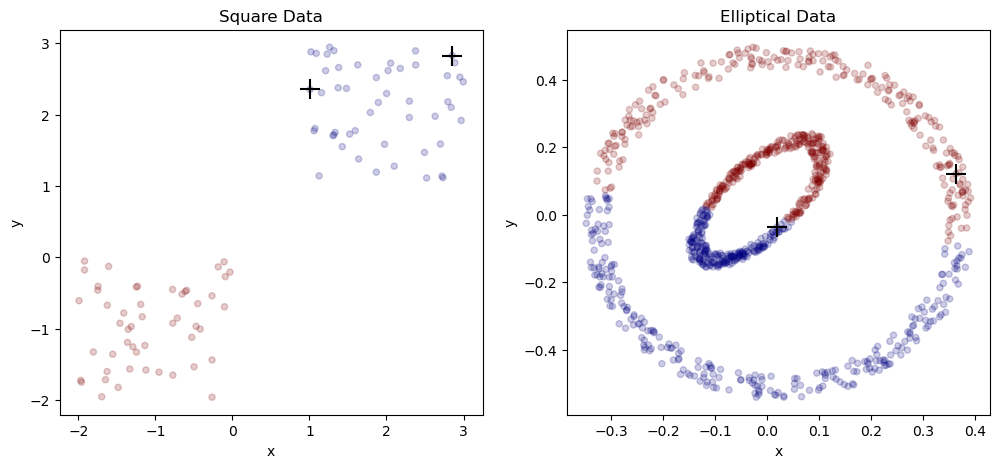

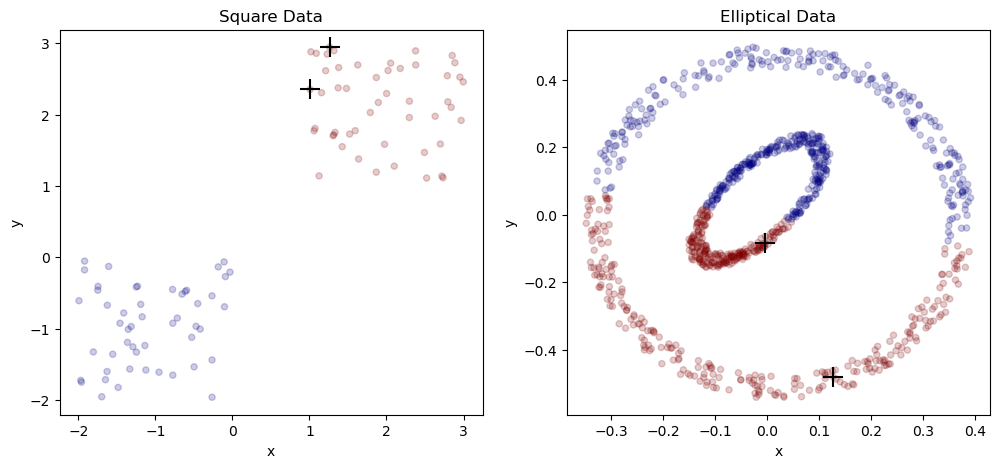

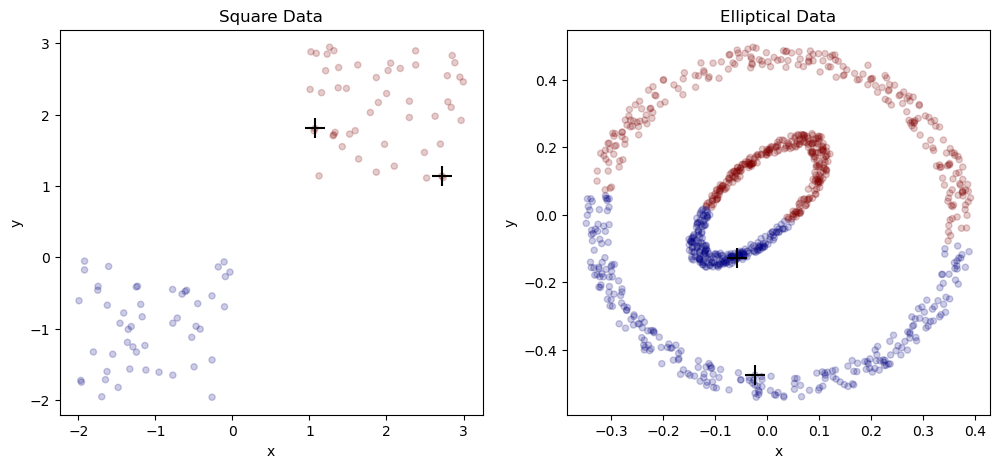

In [6]:
for i in range(20):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

    k_means1 = Kmeans(2, square_df.to_numpy())
    centroids1 = centroids_cases1[i].copy()
    k_means1.run(centroids1)
    labels1 = k_means1.labels

    k_means2 = Kmeans(2, elliptical_df.to_numpy())
    centroids2 = centroids_cases2[i].copy()
    k_means2.run(centroids2)
    labels2 = k_means2.labels

    square_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1, alpha=0.2)
    ax1.set_title('Square Data')
    elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2, alpha=0.2)
    ax2.set_title('Elliptical Data')
    ax1.scatter(centroids_cases1[i][:,0], centroids_cases1[i][:,1], c='black', s=200, alpha=1, marker="+")
    ax2.scatter(centroids_cases2[i][:,0], centroids_cases2[i][:,1], c='black', s=200, alpha=1, marker="+")